<a href="https://colab.research.google.com/github/alupo933/Python-Work-for-Bootcamp/blob/main/Recreate_Graph_Assignment_Week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# Mount to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
# import file
filename = '/content/mortgages.csv'
df = pd.read_csv(filename)
df.head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03


In [50]:
# find the value counts for Mortgage Name
df['Mortgage Name'].value_counts()

30 Year    720
15 Year    360
Name: Mortgage Name, dtype: int64

In [51]:
# Create a filter for 30 year mortgages
mortgage_filter= df['Mortgage Name']=='30 Year'
mortgage_filter.head()
df[mortgage_filter].head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03


In [52]:
# Create 2 filters for different Interest Rates
interest_filter_3 = df['Interest Rate']==0.03
interest_filter_5 = df['Interest Rate']==0.05

In [53]:
# Create a DF for 30 year mortgages with 3% Interest Rates
year_30_3_percent = df[mortgage_filter & interest_filter_3]
year_30_3_percent.head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03


In [54]:
# create a filter for the cumulative sum of 30 year mortgages at 3 percent
cumsum_3_percent=year_30_3_percent['Interest Paid'].cumsum()
cumsum_3_percent.head()
# first 3 values in the cumsum are 1000.00, 1998.28, & 2994.84

0    1000.00
1    1998.28
2    2994.84
3    3989.67
4    4982.77
Name: Interest Paid, dtype: float64

In [55]:
# Filter out 30 year mortgages at %5 interest rate
year_30_5_percent = df[mortgage_filter & interest_filter_5]
year_30_5_percent.head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
360,1,400000.00,2147.29,1666.66,480.63,399519.37,30 Year,0.05
361,2,399519.37,2147.29,1664.66,482.63,399036.74,30 Year,0.05
362,3,399036.74,2147.29,1662.65,484.64,398552.10,30 Year,0.05
363,4,398552.10,2147.29,1660.63,486.66,398065.44,30 Year,0.05
364,5,398065.44,2147.29,1658.60,488.69,397576.75,30 Year,0.05


In [56]:
# create a filter for the cumulative sum of 30 year mortgages at 5 percent
cumsum_5_percent=year_30_5_percent['Interest Paid'].cumsum()
cumsum_5_percent.head()

360    1666.66
361    3331.32
362    4993.97
363    6654.60
364    8313.20
Name: Interest Paid, dtype: float64

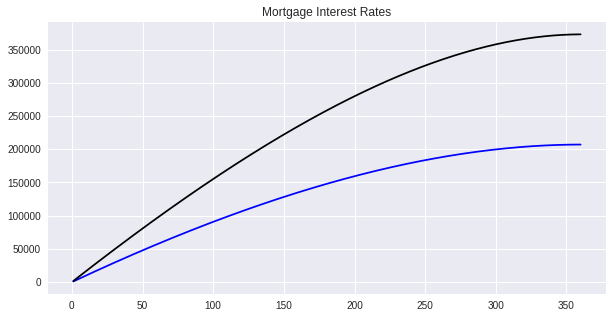

In [57]:
plt.figure(figsize=(10,5))

plt.title('Mortgage Interest Rates')

plt.plot(year_30_3_percent.Month, year_30_3_percent['Interest Paid'].cumsum(), 'blue')
plt.plot(year_30_5_percent.Month, year_30_5_percent['Interest Paid'].cumsum(), 'black');

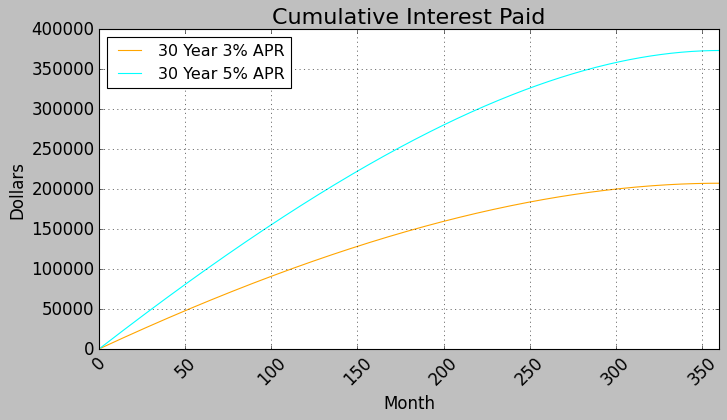

In [65]:
# plot and recreate graph making ti more clear and concise
plt.style.use('classic')
plt.figure(figsize=(10,5))

plt.plot(year_30_3_percent.Month,cumsum_3_percent, 'orange',label='30 Year 3% APR')
plt.plot(year_30_5_percent.Month,cumsum_5_percent, 'cyan',label='30 Year 5% APR');

plt.title('Cumulative Interest Paid',fontsize=20)
plt.xlabel('Month',fontsize=15)
plt.ylabel('Dollars',fontsize=15)
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)
plt.xlim(left=0,right=360)
plt.ylim(bottom=0,top=400000);
plt.legend(loc="upper left");
plt.grid();